Recommendation systems :-



In [4]:
import numpy as np
import pandas as pd
import warnings

In [5]:
warnings.filterwarnings('ignore')

Getting and working on the data set

In [6]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv('/Users/mayank/Downloads/Movie-Recommendation-System-main/Movie_Id_Titles.csv',names=column_names)

In [7]:
df.head()

,,user_id,item_id,rating,timestamp
item_id,title,user_id,item_id,rating,timestamp
1,Toy Story (1995),0,50,5,881250949
2,GoldenEye (1995),0,172,5,881250949
3,Four Rooms (1995),0,133,1,881250949
4,Get Shorty (1995),196,242,3,881250949


In [8]:
df.shape

(100004, 4)

In [9]:
df['user_id'].nunique()

945

In [10]:
df['item_id'].nunique()

1683

In [12]:
movies_titles= pd.read_csv('/Users/mayank/Downloads/Movie-Recommendation-System-main/Movie_Id_Titles.csv',header=None)
movies_titles.head()

,0,1,2,3,4,5
0,item_id,title,user_id,item_id,rating,timestamp
1,1,Toy Story (1995),0,50,5,881250949
2,2,GoldenEye (1995),0,172,5,881250949
3,3,Four Rooms (1995),0,133,1,881250949
4,4,Get Shorty (1995),196,242,3,881250949


In [13]:
movies_titles=movies_titles[[0,1]]

In [14]:
movies_titles.columns=['item_id','title']
movies_titles.head()

,item_id,title
0,item_id,title
1,1,Toy Story (1995)
2,2,GoldenEye (1995)
3,3,Four Rooms (1995)
4,4,Get Shorty (1995)


In [15]:
df=pd.merge(df,movies_titles,on='item_id')

In [16]:
df.tail(n=10)

,user_id,item_id,rating,timestamp,title
99994,806,421,4,882388897,William Shakespeare's Romeo and Juliet (1996)
99995,676,538,4,892685437,Anastasia (1997)
99996,721,262,3,877137285,In the Company of Men (1997)
99997,913,209,2,881367150,This Is Spinal Tap (1984)
99998,378,78,3,880056976,Free Willy (1993)
99999,880,476,3,880175444,"First Wives Club, The (1996)"
100000,716,204,5,879795543,Back to the Future (1985)
100001,276,1090,1,874795795,Sliver (1993)
100002,13,225,2,882399156,101 Dalmatians (1996)
100003,12,203,3,879959583,Unforgiven (1992)


Exploratory data analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')



In [20]:
# Assuming df is your DataFrame
import pandas as pd

# Convert the 'rating' column to numeric, coerce invalid values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in the 'rating' column
df.dropna(subset=['rating'], inplace=True)

# Calculate the mean of the 'rating' column
result = df.groupby('title')['rating'].mean().sort_values(ascending=False).head()



In [22]:
import pandas as pd

# Ensure 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'title' and calculate the mean of 'rating'
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
ratings['NumberofViewers']=pd.DataFrame(df.groupby('title').count()['rating'])

In [25]:
ratings.head()

,rating,NumberofViewers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [26]:
ratings.sort_values(by='rating',ascending=False)

,rating,NumberofViewers
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


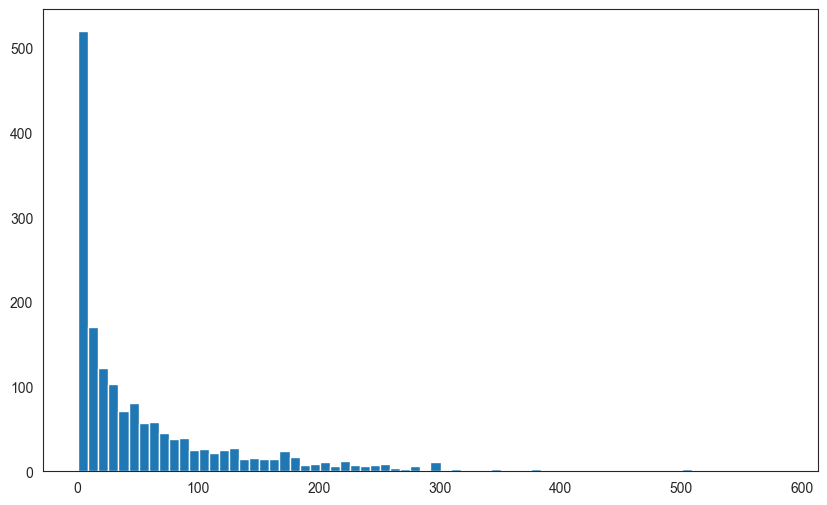

In [27]:
plt.figure(figsize=(10,6))
plt.hist(ratings['NumberofViewers'],bins=70)
plt.show()

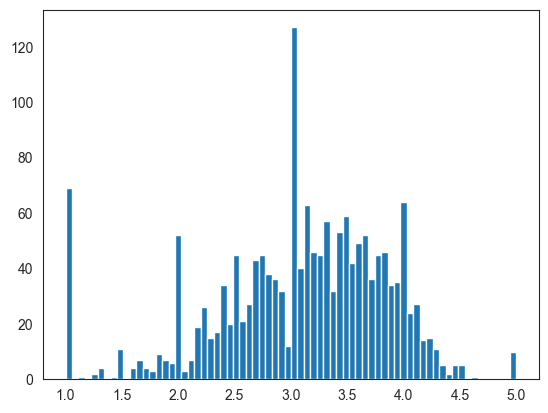

In [28]:
plt.hist(ratings['rating'],bins=70)
plt.show()

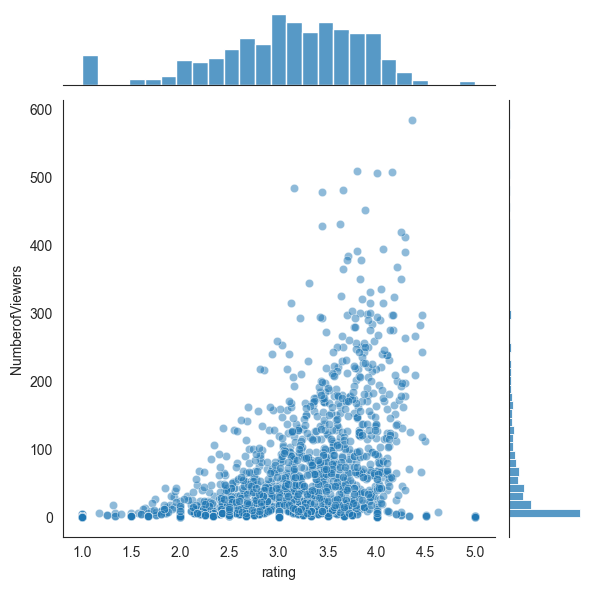

In [29]:
sns.jointplot(x='rating',y='NumberofViewers',data=ratings,alpha=0.5)

Creating Movie Recommendation
1. Creating Matrix which has index as rows, movie title as column, and cells contain the rating user has gives to a specific movie

In [30]:
df.head()

,user_id,item_id,rating,timestamp,title
1,0,50,5.0,881250949,Star Wars (1977)
2,0,172,5.0,881250949,"Empire Strikes Back, The (1980)"
3,0,133,1.0,881250949,Gone with the Wind (1939)
4,196,242,3.0,881250949,Kolya (1996)
5,186,302,3.0,891717742,L.A. Confidential (1997)


In [31]:
moviematrix=df.pivot_table(index="user_id",columns="title",values="rating")
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
10,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ratings.sort_values("NumberofViewers",ascending=False).head()

,rating,NumberofViewers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


2. Let's work on the prediction using one movie right now then we will generalize it later, for this example I am using Star Wars

In [33]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()


user_id
0      5.0
1      5.0
10     5.0
100    NaN
101    4.0
Name: Star Wars (1977), dtype: float64

3.we will correlate this user rating of star wars with the entire movie matrix and find the ones which is most correlated to tit and recommend that

In [34]:
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings).sort_values(ascending=False)
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["Correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0


In [35]:
corr_starwars.sort_values('Correlation',ascending=False).head(n=10)

,Correlation
title,
Hollow Reed (1996),1.0
Star Wars (1977),1.0
Stripes (1981),1.0
"Good Man in Africa, A (1994)",1.0
Mondo (1996),1.0
Ed's Next Move (1996),1.0
Twisted (1996),1.0
Full Speed (1996),1.0
"Scarlet Letter, The (1926)",1.0


In [36]:
corr_starwars=corr_starwars.join(ratings['NumberofViewers'])
corr_starwars.head()

,Correlation,NumberofViewers
title,,
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
Star Wars (1977),1.0,584
"Beans of Egypt, Maine, The (1994)",1.0,2
Safe Passage (1994),1.0,2


In [37]:
corr_starwars[corr_starwars['NumberofViewers']>100].head(n=10)

,Correlation,NumberofViewers
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


4. Predict for all now

In [38]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['NumberofViewers'])
    prediction=corr_movie[corr_movie['NumberofViewers']>100].sort_values('Correlation',ascending=False)

    return prediction

In [39]:
predictions=predict_movies("Toy Story (1995)")
predictions.head()


,Correlation,NumberofViewers
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
